## Classifier to Determine if Red or White Wine is Above Average Quality
In this project, I use the red and white wine quality datasets provided by UCI to determine if the wine is above average quality based on a total of $11$ metrics, including fixed/volatile acidity, residual sugar, pH, etc. \\
First, I wrangle the data to create a target dataset of booleans where quality>average quality returns true. Then, I build and train the models using `tensorflow`'s `keras` API. Each model is a single dense layer with a sigmoid activation, validated against $33\%$ of the original dataset. \\
Both models converged to $>95\%$ accuracy within the span of $50$ epochs. The white wine model converged much quicker than the red wine model, possibly because of the size of the white wine dataset. \\
One concern I have is overfitting in both models. The white wine model converged to $>99\%$ accuracy at epoch $12$, and continued training for another $88$ epochs. These results can be seen in the graphs of the loss function value and the accuracy of the model at the bottom of this page. \\
If I were to repeat this small project, I'd add a tolerance into the model fitting which exits the iterative call as soon as model accuracy reaches $95\%$. This would also reduce training time to epoch $34$ ($\leq 80$ ms) for the red wine model and epoch $8$ ($\approx16$ ms) for the white wine model. \\



In [0]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
# Loading datasets into wd
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget !wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2020-06-06 20:50:49--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.06s   

2020-06-06 20:50:49 (1.34 MB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2020-06-06 20:50:50--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2020-06-06 20:50:50--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, 

In [0]:
reds = pd.read_csv('winequality-red.csv',delimiter=';')
whites = pd.read_csv('winequality-white.csv',delimiter=';')

In [0]:
# Finding average wine quality score for both red and white wines
red_average_quality = np.mean(reds['quality'])
white_average_quality = np.mean(whites['quality'])

In [0]:
reds['above average'] = reds['quality']>red_average_quality
reds['above average'] = reds['above average'].apply(lambda x: int(x))
whites['above average'] = whites['quality']>white_average_quality
whites['above average'] = whites['above average'].apply(lambda x: int(x))
reds_targets = reds['above average']
whites_targets = whites['above average']
reds.drop('above average',axis=1,inplace=True)
whites.drop('above average',axis=1,inplace=True)

In [0]:
# Make training and test sets for red wine
red_data_train,red_data_test,red_target_train,red_target_test = train_test_split(reds,reds_targets,test_size=0.33)
reds_n,reds_d = red_data_train.shape

In [0]:
# Normalize training and test data
scaler = StandardScaler()
red_data_train = scaler.fit_transform(red_data_train)
red_data_test = scaler.transform(red_data_test)

In [0]:
# Build red wine model
red_model = tf.keras.models.Sequential([
                            tf.keras.layers.Input(shape=(reds_d,)),
                            tf.keras.layers.Dense(1,activation='sigmoid')
])
# Compile red wine model
red_model.compile(optimizer='adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
# Fit red wine model
reds_model_fitted = red_model.fit(red_data_train,red_target_train,
              validation_data = (red_data_test,red_target_test),
              epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 0.6117 - accuracy: 0.6947 - val_loss: 0.5556 - val_accuracy: 0.7273
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7106 - val_loss: 0.5271 - val_accuracy: 0.7330
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7283 - val_loss: 0.5023 - val_accuracy: 0.7367
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7395 - val_loss: 0.4798 - val_accuracy: 0.7519
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7554 - val_loss: 0.4604 - val_accuracy: 0.7746
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7628 - val_loss: 0.4429 - val_accuracy: 0.7917
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7712 - val_loss: 0.4278 - val_accuracy: 0.7955
Epoch 8/100
3

In [0]:
print('Training Score: ', red_model.evaluate(red_data_train,red_target_train))
print('Test Score: ', red_model.evaluate(red_data_test,red_target_test))

34/34 [==============================] - 0s 990us/step - loss: 0.1092 - accuracy: 0.9991
Training Score:  [0.10917939990758896, 0.9990662932395935]
17/17 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 1.0000
Test Score:  [0.10833031684160233, 1.0]


In [0]:
# Make training and test sets
whites_data_train,whites_data_test,whites_target_train,whites_target_test = train_test_split(whites,whites_targets,test_size=0.33)

In [0]:
# Normalizing data
whites_data_train = scaler.fit_transform(whites_data_train)
whites_data_test = scaler.transform(whites_data_test)
whites_n,whites_d = whites_data_train.shape

In [0]:
# Build model
white_model = tf.keras.models.Sequential([
                                          tf.keras.layers.Input(shape=(whites_d,)),
                                          tf.keras.layers.Dense(units=1,activation='sigmoid')
])
# Compile model
white_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
# Fit model
whites_fitted_model = white_model.fit(whites_data_train,whites_target_train,
                                      validation_data = (whites_data_test,whites_target_test),
                                      epochs = 100)

Epoch 1/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.6215 - val_loss: 0.6373 - val_accuracy: 0.6500
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6824 - val_loss: 0.5486 - val_accuracy: 0.7205
Epoch 3/100
103/103 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7543 - val_loss: 0.4807 - val_accuracy: 0.7879
Epoch 4/100
103/103 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8098 - val_loss: 0.4275 - val_accuracy: 0.8460
Epoch 5/100
103/103 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8625 - val_loss: 0.3871 - val_accuracy: 0.8899
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.9174 - val_loss: 0.3552 - val_accuracy: 0.9295
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.9485 - val_loss: 0.3300 - val_accuracy: 0.9567

In [0]:
print('Training Score: ', white_model.evaluate(whites_data_train,whites_target_train))
print('Test Score: ', white_model.evaluate(whites_data_test,whites_target_test))

103/103 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 1.0000
Training Score:  [0.011700209230184555, 1.0]
51/51 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 1.0000
Test Score:  [0.012079102918505669, 1.0]


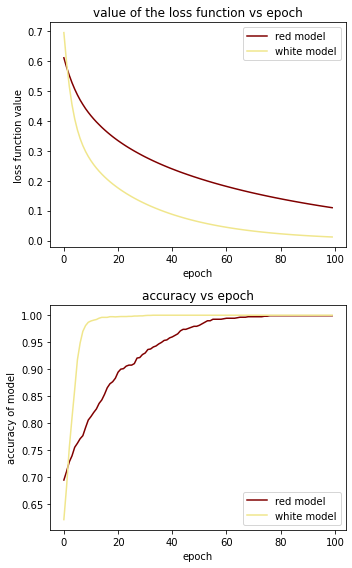

In [0]:
# Plotting the accuracy and loss
fig = plt.figure(figsize=(5,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(reds_model_fitted.history['loss'],color='maroon',label='red model')
ax1.plot(whites_fitted_model.history['loss'],color='khaki',label='white model')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss function value')
ax1.set_title('value of the loss function vs epoch')
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(reds_model_fitted.history['accuracy'],color='maroon',label='red model')
ax2.plot(whites_fitted_model.history['accuracy'],color='khaki',label='white model')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy of model')
ax2.set_title('accuracy vs epoch')
ax2.legend()

plt.tight_layout()